In [148]:
import matplotlib.pyplot as plt
import pandas as pd
unrate = pd.read_csv('unrate.csv')
pres = pd.read_csv('president Year and Dates.csv',header = 0)
pres['Start_Date']=pd.to_datetime(pres['Start Date'])
pres['End_Date']=pd.to_datetime(pres['End Date'])
pres.dropna(inplace = True)
print(pres)
unrate['DATE']=pd.to_datetime(unrate['DATE'])
#print(unrate['DATE'])
head = unrate.head(12)

    Start Date    End Date             President       Party Start_Date  \
0    4/12/1945   1/20/1953       Harry S. Truman  Democratic 1945-04-12   
1    1/20/1953   1/20/1961  Dwight D. Eisenhower  Republican 1953-01-20   
2    1/20/1961  11/22/1963       John F. Kennedy  Democratic 1961-01-20   
3   11/22/1963   1/20/1969     Lyndon B. Johnson  Democratic 1963-11-22   
4    1/20/1969    8/9/1974         Richard Nixon  Republican 1969-01-20   
5     8/9/1974   1/20/1977           Gerald Ford  Republican 1974-08-09   
6    1/20/1977   1/20/1981          Jimmy Carter  Democratic 1977-01-20   
7    1/20/1981   1/20/1989         Ronald Reagan  Republican 1981-01-20   
8    1/20/1989   1/20/1993     George H. W. Bush  Republican 1989-01-20   
9    1/20/1993   1/20/2001          Bill Clinton  Democratic 1993-01-20   
10   1/20/2001   1/20/2009        George W. Bush  Republican 2001-01-20   
11   1/20/2009   1/20/2017          Barack Obama  Democratic 2009-01-20   

     End_Date  
0  1953-

In [149]:
#Number of presidents by party taken in the study
pres.groupby('Party').agg('count')['President']

Party
Democratic    6
Republican    6
Name: President, dtype: int64

In [150]:
import pandas as pd
import sqlite3
from datetime import datetime


#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
pres.to_sql('pres', conn, index=False)
unrate.to_sql('unrate', conn, index=False)

qry = '''
    select  
*
    from
        pres join unrate on
        DATE between Start_Date and End_Date
    '''
df = pd.read_sql_query(qry, conn)
df['DATE']=pd.to_datetime(df['DATE'])

#print(df[['President', 'Party','DATE', 'VALUE']])


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [186]:
df['Democratic'] = ''
df['Republic'] = ''
df
val = 'Democratic'

def AddValue(Data):
    if Data['Party'] == 'Democratic':
        Data[val] = Data['VALUE']
        return Data
    if Data['Party'] == 'Republican':
        Data['Republic'] = Data['VALUE']
        return Data

df = df.apply(AddValue,axis = 1)
df['Democratic']=pd.to_numeric(df['Democratic'])
df['Republic']=pd.to_numeric(df['Republic'])
df['DATE']=pd.to_datetime(df['DATE'])
df.set_index('DATE',inplace = True)
df

,Start Date,End Date,President,Party,Start_Date,End_Date,VALUE,Democratic,Republic,Harry S. Truman,...,John F. Kennedy,Lyndon B. Johnson,Richard Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama
DATE,,,,,,,,,,,,,,,,,,,,,
1948-01-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.4,3.4,NaN,,...,,,,,,,,,,
1948-02-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.8,3.8,NaN,,...,,,,,,,,,,
1948-03-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,4.0,4.0,NaN,,...,,,,,,,,,,
1948-04-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.9,3.9,NaN,,...,,,,,,,,,,
1948-05-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.5,3.5,NaN,,...,,,,,,,,,,
1948-06-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.6,3.6,NaN,,...,,,,,,,,,,
1948-07-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.6,3.6,NaN,,...,,,,,,,,,,
1948-08-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.9,3.9,NaN,,...,,,,,,,,,,
1948-09-01,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,3.8,3.8,NaN,,...,,,,,,,,,,


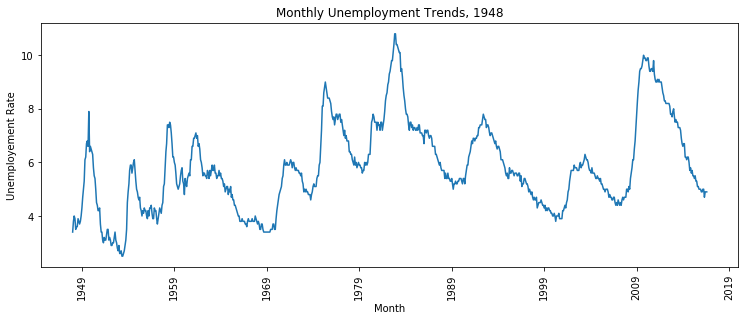

In [190]:
plt.figure(figsize=(12.5,4.5))
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Unemployement Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.plot(df.index,df['VALUE'])
#plt.scatter(df.index,df['Democratic'],label = 'Dems',marker = '^',color = 'green')
plt.show()

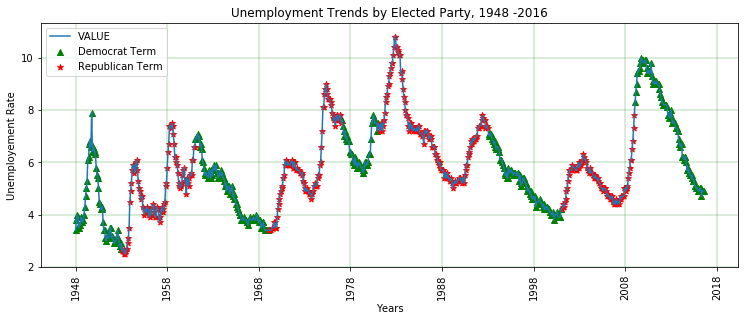

In [189]:
#Dems vs Republicans 
plt.figure(figsize=(12.5,4.5))
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Unemployement Rate')
plt.title('Unemployment Trends by Elected Party, 1948 -2016')
plt.plot(df.index,df['VALUE'])
plt.scatter(df.index,df['Democratic'],label = 'Democrat Term',marker = '^',color = 'green')
plt.scatter(df.index,df['Republic'],label = 'Republican Term',marker = '*',color = 'red')
plt.grid(color='g', linestyle='-', linewidth=2, alpha = .15)
plt.legend(loc = 'upper left')
plt.show()

In [168]:
ListOfPrez = df.President.unique()

for i in ListOfPrez:
    
    df[i] = ''
    

Value = [".",
",",
"o",
"v",
"^",
"<",
">",
"1",
"2",
"3",
"4",
"8"]
PrezSymbol = dict(zip(ListOfPrez,Value))
print(PrezSymbol)

def AddPrezValue(Data):
    President_name = Data['President']
    Data[President_name] = Data['VALUE']
    return Data
df1 = df.copy()
df1 = df1.apply(AddPrezValue,axis = 1)
df1

{'Harry S. Truman': '.', 'Dwight D. Eisenhower': ',', 'John F. Kennedy': 'o', 'Lyndon B. Johnson': 'v', 'Richard Nixon': '^', 'Gerald Ford': '<', 'Jimmy Carter': '>', 'Ronald Reagan': '1', 'George H. W. Bush': '2', 'Bill Clinton': '3', 'George W. Bush': '4', 'Barack Obama': '8'}


,Start Date,End Date,President,Party,Start_Date,End_Date,DATE,VALUE,Democratic,Republic,...,John F. Kennedy,Lyndon B. Johnson,Richard Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama
0,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-01-01,3.4,3.4,NaN,...,,,,,,,,,,
1,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-02-01,3.8,3.8,NaN,...,,,,,,,,,,
2,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-03-01,4.0,4.0,NaN,...,,,,,,,,,,
3,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-04-01,3.9,3.9,NaN,...,,,,,,,,,,
4,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-05-01,3.5,3.5,NaN,...,,,,,,,,,,
5,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-06-01,3.6,3.6,NaN,...,,,,,,,,,,
6,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-07-01,3.6,3.6,NaN,...,,,,,,,,,,
7,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-08-01,3.9,3.9,NaN,...,,,,,,,,,,
8,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-09-01,3.8,3.8,NaN,...,,,,,,,,,,
9,4/12/1945,1/20/1953,Harry S. Truman,Democratic,1945-04-12 00:00:00,1953-01-20 00:00:00,1948-10-01,3.7,3.7,NaN,...,,,,,,,,,,


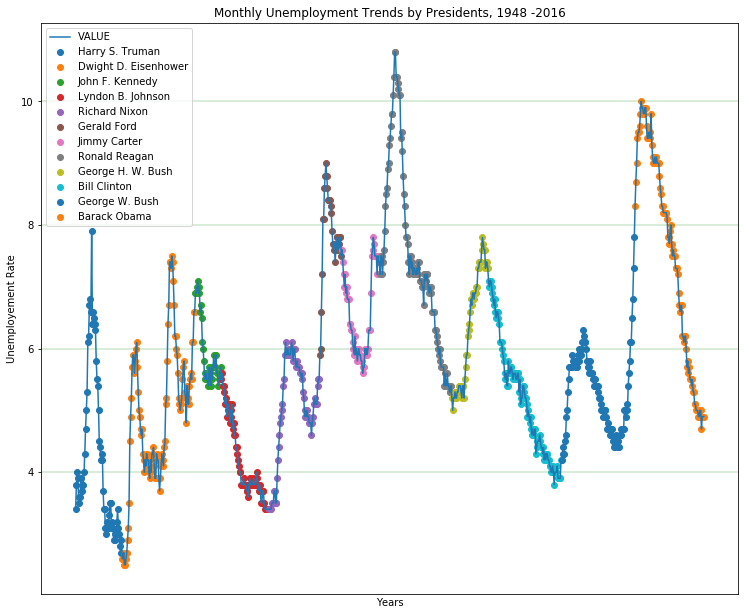

In [176]:
#Dems vs Republicans 
plt.figure(figsize=(12.5,10.5))
plt.xticks([])
plt.xlabel('Years')
plt.ylabel('Unemployement Rate')
#plt.yticks([])
plt.title('Monthly Unemployment Trends by Presidents, 1948 -2016')
plt.plot(df.index,df['VALUE'])
for i in ListOfPrez:
    plt.scatter(df1.index,pd.to_numeric(df1[i]),label = i)
#plt.scatter(df1.index,pd.to_numeric(df1[i]),label = 'Harry S. Truman',marker = PrezSymbol['Harry S. Truman'],color = 'green')
#plt.scatter(df.index,df['Republic'],label = 'Republic',marker = '*',color = 'red')
plt.grid(color='g', linestyle='-', linewidth=2, alpha = .15)
plt.legend(loc = 'upper left')
plt.show()

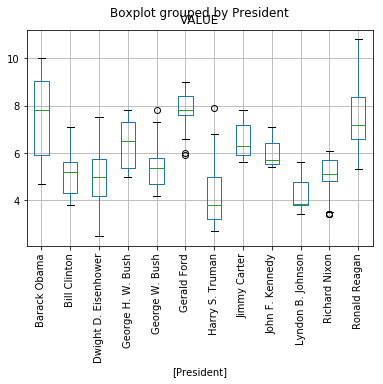

In [185]:
boxplot = df1.boxplot(column=['VALUE'],by=['President'])
plt.xticks(rotation = 90)
plt.show()

In [198]:
df1.groupby('President').agg(['mean','std'])['VALUE']
#df1.groupby('President').agg('std')['VALUE']

,mean,std
President,,
Barack Obama,7.561538,1.714433
Bill Clinton,5.171875,0.938386
Dwight D. Eisenhower,4.931250,1.200291
George H. W. Bush,6.343750,0.944842
George W. Bush,5.308333,0.681433
Gerald Ford,7.837931,0.741819
Harry S. Truman,4.240984,1.327827
Jimmy Carter,6.535417,0.682763
John F. Kennedy,5.961765,0.568898
